In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from astropy.time import Time
from astropy import units as u, constants as cst

from orbitize.results import Results
from orbitize.sampler import MCMC
from orbitize.lnlike import chi2_lnlike
from orbitize.system import transform_errors

In [2]:
# load the posteriors from the various orbit fits

nograv_results = Results()
nograv_results.load_results("results/with_literature_astrom/chains.hdf5")

onegrav_results = Results()
onegrav_results.load_results(
    "results/with_literature_astromwith_first_vlti_point/chains.hdf5"
)

other_onegrav_results = Results()
other_onegrav_results.load_results(
    "results/with_literature_astromwith_second_vlti_point/chains.hdf5"
)

threegrav_results = Results()
threegrav_results.load_results(
    "results/with_literature_astromwith_first_vlti_pointwith_second_vlti_pointwith_third_vlti_point/chains.hdf5"
)

onlygrav_results = Results()
onlygrav_results.load_results(
    "results/with_first_vlti_pointwith_second_vlti_point/chains.hdf5"
)

fixed_ecc_results = Results()
fixed_ecc_results.load_results(
    "results/with_literature_astromwith_first_vlti_pointwith_second_vlti_pointwith_third_vlti_point_fixed_ecc/chains.hdf5"
)

lin_ecc_results = Results()
lin_ecc_results.load_results(
    "results/with_literature_astromwith_first_vlti_pointwith_second_vlti_pointwith_third_vlti_point_linear_ecc/chains.hdf5"
)

all_results = {
    nograv_results: ["literature data only", "results/with_literature_astrom/"],
    onegrav_results: [
        "literature + GRAVITY epoch 1",
        "results/with_literature_astromwith_first_vlti_point/",
    ],
    other_onegrav_results: [
        "literature + GRAVITY epoch 2",
        "results/with_literature_astromwith_second_vlti_point/",
    ],
    threegrav_results: [
        "all data",
        "results/with_literature_astromwith_first_vlti_pointwith_second_vlti_pointwith_third_vlti_point/",
    ],
    onlygrav_results: [
        "first two GRAVITY data only",
        "results/with_first_vlti_pointwith_second_vlti_point/",
    ],
    fixed_ecc_results: [
        "all data, e fixed to 0",
        "results/with_literature_astromwith_first_vlti_pointwith_second_vlti_pointwith_third_vlti_point_fixed_ecc/",
    ],
    lin_ecc_results: [
        "all data, decreasing e prior",
        "results/with_literature_astromwith_first_vlti_pointwith_second_vlti_pointwith_third_vlti_point_linear_ecc/",
    ],
}

In [3]:
from fit_orbit import confidence_ellipse
from orbitize.system import seppa2radec

data = threegrav_results.data
print(data)

fig, ax = plt.subplots(figsize=(10, 10))

for i in range(len(data)):
    datapoint = data[i]

    # skip plotting the point with huge errors
    if datapoint["quant1_err"] > 10:
        continue

    if datapoint["quant_type"] == "seppa":
        sep, pa, sep_err, pa_err = (
            datapoint["quant1"],
            datapoint["quant2"],
            datapoint["quant1_err"],
            datapoint["quant2_err"],
        )
        raerr, decerr, corr = transform_errors(sep, pa, sep_err, pa_err, 0, seppa2radec)
        facecolor = "hotpink"
        alpha = 0.05 * (i + 1)
    elif datapoint["quant_type"] == "radec":
        raerr, decerr, corr = (
            datapoint["quant1_err"],
            datapoint["quant2_err"],
            datapoint["quant12_corr"],
        )
        facecolor = "rebeccapurple"
        alpha = 0.07 * (i + 1)
    else:
        continue

    ellipse = confidence_ellipse(
        0, 0, corr, raerr, decerr, ax, n_std=1, alpha=alpha, facecolor=facecolor
    )

plt.xlabel("$\Delta$R.A. [mas]")
plt.ylabel("$\Delta$decl. [mas]")
plt.xlim(5, -5)
plt.ylim(-5, 5)
plt.savefig("results/plots/art.png", dpi=250)

    epoch      object  quant1 quant1_err ... quant12_corr quant_type instrument
-------------- ------ ------- ---------- ... ------------ ---------- ----------
57538.42600476      1   830.4        4.9 ...          nan      seppa     SPHERE
57565.51000561      1   830.1        3.2 ...          nan      seppa     SPHERE
       57791.0      1   827.6        1.5 ...          nan      seppa     SPHERE
     57793.055      1   828.8        1.5 ...          nan      seppa     SPHERE
       57891.0      1   832.0        3.0 ...          nan      seppa       NACO
       57892.0      1   850.0       20.0 ...          nan      seppa       NACO
     58250.035      1   822.9        2.0 ...          nan      seppa     SPHERE
     58250.035      1   826.4        2.4 ...          nan      seppa     SPHERE
       58263.5      1    14.0       15.0 ...          nan         rv      defrv
     59221.312      1 415.613   0.107484 ...    -0.095039      radec    GRAVITY
     59602.271      1 416.269      0.035

    epoch      object  quant1 quant1_err ... quant12_corr quant_type instrument
-------------- ------ ------- ---------- ... ------------ ---------- ----------
57538.42600476      1   830.4        4.9 ...          nan      seppa     SPHERE
57565.51000561      1   830.1        3.2 ...          nan      seppa     SPHERE
       57791.0      1   827.6        1.5 ...          nan      seppa     SPHERE
     57793.055      1   828.8        1.5 ...          nan      seppa     SPHERE
       57891.0      1   832.0        3.0 ...          nan      seppa       NACO
       57892.0      1   850.0       20.0 ...          nan      seppa       NACO
     58250.035      1   822.9        2.0 ...          nan      seppa     SPHERE
     58250.035      1   826.4        2.4 ...          nan      seppa     SPHERE
       58263.5      1    14.0       15.0 ...          nan         rv      defrv
     59221.312      1 415.613   0.107484 ...    -0.095039      radec    GRAVITY
     59602.271      1 416.269      0.035

KeyboardInterrupt: 

In [4]:
# make MCMC convergence plots
params = {"ecc1": "e", "pan1": "$\\Omega$", "aop1": "$\\omega$"}
for param in params.keys():
    for res in all_results:
        smas = res.post[:, res.system.param_idx[param]]

        num_walkers = 1000
        n_steps = len(smas) // num_walkers
        chn = smas.reshape((num_walkers, n_steps))

        walkers_to_plot = np.random.choice(num_walkers, size=100, replace=False)
        plt.figure()
        chop_after = 0
        for w in walkers_to_plot:
            plt.plot(chn[w, :][chop_after:], color="k", alpha=0.005)
        plt.xlabel("step number / 100")
        plt.ylabel(params[param])
        plt.title("{}".format(all_results[res][0]))
        plt.savefig("{}{}chains.png".format(all_results[res][1], param), dpi=250)
        plt.close()

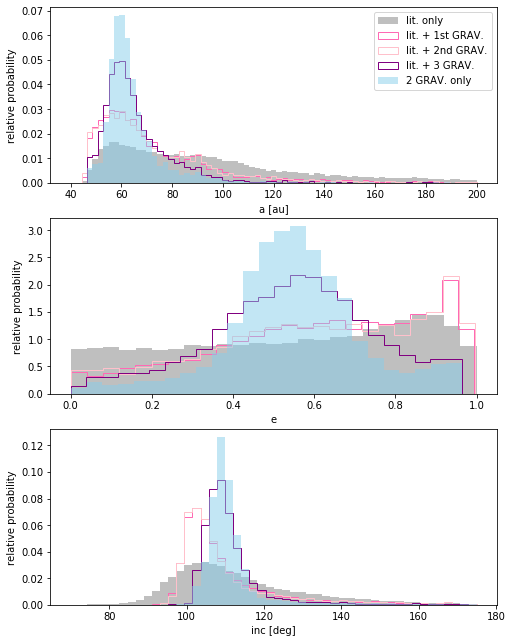

In [4]:
# plot all the sma, ecc, and inc posteriors
fig, ax = plt.subplots(3, 1, figsize=(8, 11))

ax[0].set_xlabel("a [au]")
ax[1].set_xlabel("e")
ax[2].set_xlabel("inc [deg]")

plot_dict = {
    nograv_results: {"ec": None, "fc": "grey", "alpha": 0.5, "histtype": "stepfilled"},
    onegrav_results: {"ec": "hotpink", "fc": "white", "histtype": "step"},
    other_onegrav_results: {"ec": "pink", "fc": "white", "histtype": "step"},
    threegrav_results: {"ec": "purple", "fc": "white", "histtype": "step"},
    onlygrav_results: {
        "ec": None,
        "fc": "skyblue",
        "histtype": "stepfilled",
        "alpha": 0.5,
    },
}

for res, lab in zip(
    [
        nograv_results,
        onegrav_results,
        other_onegrav_results,
        threegrav_results,
        onlygrav_results,
    ],
    [
        "lit. only",
        "lit. + 1st GRAV.",
        "lit. + 2nd GRAV.",
        "lit. + 3 GRAV.",
        "2 GRAV. only",
    ],
):
    ax[0].hist(
        res.post[:, res.system.param_idx["sma1"]],
        bins=75,
        range=(40, 200),
        label=lab,
        **plot_dict[res],
        density=True
    )
    ax[1].hist(
        res.post[:, res.system.param_idx["ecc1"]],
        bins=25,
        **plot_dict[res],
        density=True
    )
    ax[2].hist(
        np.degrees(res.post[:, res.system.param_idx["inc1"]]),
        range=(70, 175),
        bins=50,
        **plot_dict[res],
        density=True
    )

for a in ax:
    a.set_ylabel("relative probability")
    # a.set_yticks([])
ax[0].legend()
plt.savefig("results/plots/orbit_compare.png", dpi=250)

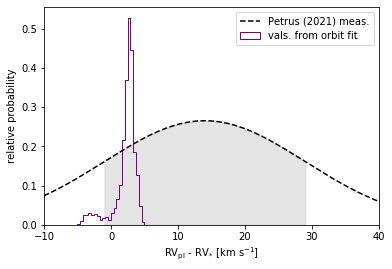

In [7]:
# plot the planetary RV vs the measurement

rv_epoch = threegrav_results.data[threegrav_results.data["quant_type"] == "rv"][
    "epoch"
].value[0]

# compute the planetary RV at the measured epoch for each posterior sample
_, _, rv_out = threegrav_results.system.compute_all_orbits(
    threegrav_results.post.T, epochs=np.array([rv_epoch])
)

rv_predictions = rv_out[0, 1, :]
plt.figure()
plt.hist(
    rv_predictions,
    bins=25,
    density=True,
    label="vals. from orbit fit",
    histtype="step",
    color="purple",
)

# overplot the RV measurement and uncertainty
rv_meas = threegrav_results.data[threegrav_results.data["quant_type"] == "rv"][
    "quant1"
].value[0]
rv_unc = threegrav_results.data[threegrav_results.data["quant_type"] == "rv"][
    "quant1_err"
].value[0]

rv2plot = np.linspace(-10, 40, int(1e3))


def norm(x, mu, sig):
    return 1 / (sig * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sig) ** 2)


plt.plot(
    rv2plot,
    10 * norm(rv2plot, rv_meas, rv_unc),
    label="Petrus (2021) meas.",
    color="k",
    ls="--",
)
# plt.yticks([])
plt.ylabel("relative probability")
plt.xlabel("RV$_{{\\rm pl}}$ - RV$_{{*}}$ [km s$^{{-1}}$]")
plt.xlim(-10, 40)

onesig_rvrange = np.linspace(rv_meas - rv_unc, rv_meas + rv_unc, int(1e3))
plt.fill_between(
    onesig_rvrange,
    np.zeros(int(1e3)),
    10 * norm(onesig_rvrange, rv_meas, rv_unc),
    color="k",
    alpha=0.1,
    ec=None,
)

plt.legend()
plt.savefig("results/plots/rv_meas.png", dpi=250)

0.9266284403669721


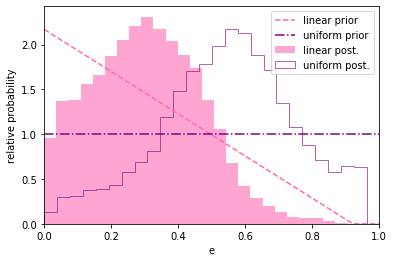

In [5]:
# compare the eccentricity posteriors using different priors

plt.figure()
colors = ["hotpink", "purple"]
histtypes = ["stepfilled", "step"]
labels = ["linear post.", "uniform post."]
for i, res in enumerate([lin_ecc_results, threegrav_results]):
    plt.hist(
        res.post[:, res.system.param_idx["ecc1"]],
        bins=25,
        alpha=0.6,
        color=colors[i],
        density=True,
        histtype=histtypes[i],
        label=labels[i],
    )

# overplot the prior in each case
m = -2.18
b = 2.01
xplot = np.array([0, -b / m, 1])
norm = -0.5 * b**2 / m
print(norm)
yplot = (m * xplot + b) / norm
yplot[-1] = 0

plt.plot(xplot, yplot, color=colors[0], ls="--", label="linear prior")
plt.plot(xplot, np.ones(len(xplot)), color=colors[1], ls="-.", label="uniform prior")
plt.xlim(0, 1)
plt.legend()
# plt.yticks([])
plt.ylabel("relative probability")

plt.xlabel("e")
plt.savefig("results/plots/ecc_compare.png", dpi=250)

0.0
0.29660732319546323
-15.514103819525001
-15.490626142760085


(16.5, 17.5)

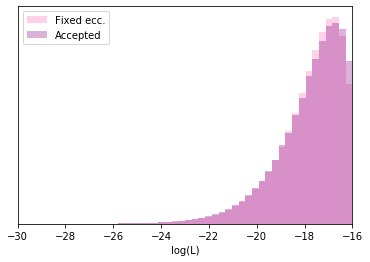

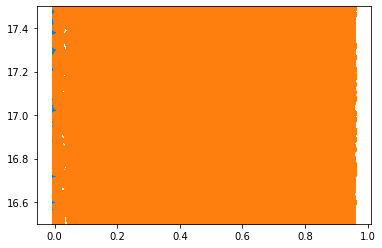

In [8]:
# plot the log-likelihoods for the fixed eccentricity posterior vs the accepted one


plt.figure()
labels = ["Fixed e", "Accepted"]
colors = ["hotpink", "purple"]
for i, res in enumerate([fixed_ecc_results, threegrav_results]):
    plt.hist(
        res.lnlike,
        bins=50,
        alpha=0.3,
        density=True,
        label=labels[i],
        color=colors[i],
        range=(-30, -16),
    )
    print(res.post[:, 1][np.argmax(res.lnlike)])
    # plt.hist(res.lnlike[res.post[:,1] > 0.4], density=True, alpha=0.5,bins=50, range=(-30,-16))
plt.yticks([])
plt.legend()
plt.xlim(-30, -16)
plt.xlabel("log(L)")
plt.savefig("results/plots/ecc_lnlike_compare.png", dpi=250)

plt.figure()
for i, res in enumerate([fixed_ecc_results, threegrav_results]):
    ecc_post = res.post[:, 1]
    plt.scatter(ecc_post, -1 * res.lnlike)
    print(np.max(res.lnlike))
plt.ylim(16.5, 17.5)

Best lnlike for e=0.000: 15.536
Best lnlike for e=0.042: 15.538
Best lnlike for e=0.084: 15.558
Best lnlike for e=0.126: 15.558
Best lnlike for e=0.168: 15.552
Best lnlike for e=0.211: 15.555
Best lnlike for e=0.253: 15.537
Best lnlike for e=0.295: 15.559
Best lnlike for e=0.337: 15.525
Best lnlike for e=0.379: 15.527
Best lnlike for e=0.421: 15.517
Best lnlike for e=0.463: 15.515
Best lnlike for e=0.505: 15.527
Best lnlike for e=0.547: 15.527
Best lnlike for e=0.589: 15.533
Best lnlike for e=0.632: 15.543
Best lnlike for e=0.674: 15.556
Best lnlike for e=0.716: 15.581
Best lnlike for e=0.758: 15.578
Best lnlike for e=0.800: 15.674


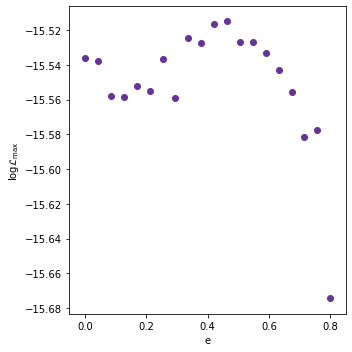

In [8]:
from scipy.optimize import minimize

plt.figure(figsize=(5, 5))
for e in np.linspace(0, 0.8, 20):
    e_sampler = MCMC(threegrav_results.system)

    def neg_lnlike_func(x):
        sma, inc, aop, pan, tau = x
        if (
            sma < 0
            or inc < 0
            or inc > np.pi
            or pan < 0
            or pan > np.pi
            or tau < 0
            or tau > 1
        ):
            return np.inf
        return -1 * e_sampler._logl([sma, e, inc, aop, pan, tau, 9.28, 1.96])

    p0 = [70, np.radians(110), np.radians(200), np.radians(160), 0.5]
    res = minimize(
        neg_lnlike_func,
        p0,
        method="Nelder-Mead",
        options={"maxiter": int(1e9), "maxfev": int(1e10)},
    )

    best_lnlike = res.fun
    print("Best lnlike for e={:.3f}: {:.3f}".format(e, best_lnlike))

    plt.scatter([e], [-best_lnlike], color="rebeccapurple")

plt.xlabel("e")
plt.ylabel("log$\\mathcal{{L}}_{{\\mathrm{{max}}}}$")
# plt.ylim(-17.5, -16.9)
plt.tight_layout()
plt.savefig("results/plots/ecc_lnlike.png", dpi=250)

In [10]:
# compute AIC & WAIC for each of the three various-eccentricity-prior fits
# ref: http://www.stat.columbia.edu/~gelman/research/published/waic_understand3.pdf
# I like the WAIC because it is v Bayesian and ya girl is v Bayesian. I'll include a pedantic rant in the paper about it.

from scipy.special import logsumexp


def calc_lnlikes(system, params):
    model, jitter = system.compute_model(params)

    # fold data/errors to match model output shape. In particualr, quant1/quant2 are interleaved
    data = np.array([system.data_table["quant1"], system.data_table["quant2"]]).T

    # errors below required for lnlike function below
    errs = np.array(
        [system.data_table["quant1_err"], system.data_table["quant2_err"]]
    ).T

    corrs = system.data_table["quant12_corr"]

    # grab all seppa indices
    seppa_indices = system.all_seppa

    # compute lnlike
    lnlikes = chi2_lnlike(data, errs, corrs, model, jitter, seppa_indices)

    return lnlikes


def waic(results, N=100000):
    # lots of this code stolen from pymc3 which has an excellent stats module

    # compute log-pointwise predictive density for in-sample data
    random_idx = np.random.choice(np.arange(len(results.post)), size=N)
    lnlikes = calc_lnlikes(results.system, results.post[random_idx,].T)

    # for RVs, second dimension of a data point (x1, x2) is nan
    lnlikes_i = lnlikes[:, 0, :] + np.nan_to_num(lnlikes[:, 1, :])

    # this is the log pointwise predictive density of each data point (i.e. the average likelihood of each posterior sample)
    lppd_i = logsumexp(lnlikes_i, axis=1, b=1 / N)  # eq 5 of Gelman paper linked above
    lppd = np.sum(lppd_i)
    vars_lpd = np.var(lnlikes_i, axis=1)
    # TODO: warning if vars_lpd > 0.4
    p_waic = np.sum(vars_lpd)

    # draw S samples from posterior
    # compute log-likelihood of one data point across all models, and add together, then divide by S and add across all models
    # second term computes variance of log-chi2 probability for each data point then adds over data points
    # multiply by -2 to put on same scale as AIC

    return -2 * (lppd - p_waic)


# intuition: want lppd to be as large as possible (i.e. want average probability of data given model to be large), so want WAIC to be as small as possible
e_uniform_waic = waic(threegrav_results)
e_dec_waic = waic(lin_ecc_results)
e_fixed_waic = waic(fixed_ecc_results)
print(
    e_uniform_waic - e_fixed_waic,
    e_dec_waic - e_fixed_waic,
    e_fixed_waic - e_fixed_waic,
)

# AIC = -2 * MLE + 2k, where k = # free params. The MLE is essentially the same for all three models (~15.5), so the deltaAIC is 6 ("evidence is positive but not strong")

0.22413729289585405 0.043884864392431666 0.0


In [17]:
# make an overleaf table of all of the fit results


def format_post(
    results_obj, el_label, n_decimals=1, degrees=False, dont_print_circ_toggle=False
):
    quants = np.quantile(
        results_obj.post[:, results_obj.system.param_idx[el_label]], [0.16, 0.50, 0.84]
    )

    if dont_print_circ_toggle:
        return "--"

    if degrees:
        quants = np.degrees(quants)

    med = quants[1]
    up_lim = quants[2] - quants[1]
    lo_lim = quants[1] - quants[0]

    if up_lim == lo_lim:
        if el_label == "ecc1":
            return "=0"

    if np.abs(up_lim - lo_lim) <= 1 / (10 * n_decimals):
        return "${:.{prec}f}\\pm{{{:.{prec}f}}}$".format(med, up_lim, prec=n_decimals)

    return "${:.{prec}f}^{{+{:.{prec}f}}}_{{-{:.{prec}f}}}$".format(
        med, up_lim, lo_lim, prec=n_decimals
    )


for res in all_results.keys():
    dont_print_circ_toggle = False
    if all_results[res][0] == "all data, ecc. fixed to 0":
        dont_print_circ_toggle = True

    print(
        "{} & {} & {} & {} & {} & {} & {} & {} & {} \\\\".format(
            all_results[res][0],
            format_post(res, "sma1", n_decimals=1),
            format_post(res, "ecc1", n_decimals=2),
            format_post(res, "inc1", n_decimals=1, degrees=True),
            format_post(
                res,
                "aop1",
                n_decimals=1,
                degrees=True,
                dont_print_circ_toggle=dont_print_circ_toggle,
            ),
            format_post(res, "pan1", n_decimals=1, degrees=True),
            format_post(
                res, "tau1", n_decimals=2, dont_print_circ_toggle=dont_print_circ_toggle
            ),
            format_post(res, "plx", n_decimals=2),
            format_post(res, "mtot", n_decimals=2),
        )
    )

literature data only & $92.5^{+88.7}_{-32.0}$ & $0.58^{+0.29}_{-0.38}$ & $109.5^{+20.5}_{-11.2}$ & $181.6^{+107.6}_{-128.9}$ & $171.9^{+163.9}_{-45.3}$ & $0.36^{+0.30}_{-0.17}$ & $9.30\pm{0.03}$ & $1.96\pm{0.04}$ \\
literature + GRAVITY epoch 1 & $66.1^{+28.3}_{-12.7}$ & $0.64^{+0.26}_{-0.31}$ & $105.6^{+13.9}_{-5.0}$ & $195.6^{+74.0}_{-95.9}$ & $156.9^{+171.0}_{-8.1}$ & $0.44\pm{0.15}$ & $9.30\pm{0.03}$ & $1.96\pm{0.04}$ \\
literature + GRAVITY epoch 2 & $66.3^{+27.2}_{-13.0}$ & $0.63\pm{0.27}$ & $105.4^{+14.9}_{-4.8}$ & $194.3^{+70.5}_{-101.6}$ & $156.5^{+172.2}_{-7.6}$ & $0.43\pm{0.15}$ & $9.30\pm{0.03}$ & $1.96\pm{0.04}$ \\
all data & $62.2^{+14.7}_{-7.2}$ & $0.55\pm{0.19}$ & $109.2^{+6.3}_{-3.9}$ & $189.3^{+33.3}_{-32.3}$ & $155.1^{+9.0}_{-4.9}$ & $0.44\pm{0.10}$ & $9.30\pm{0.03}$ & $1.96\pm{0.04}$ \\
first two GRAVITY data only & $61.4^{+9.7}_{-5.1}$ & $0.55\pm{0.14}$ & $109.6^{+4.4}_{-2.9}$ & $190.3^{+25.8}_{-19.3}$ & $155.4^{+7.2}_{-3.6}$ & $0.44\pm{0.07}$ & $9.30\pm{0.03}$ & $

0.2056700173384229
0.06993503916549973


(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.21306818, 0.42613636, 2.34375   , 2.62784091, 3.33806818,
        4.33238636, 4.75852273, 5.53977273, 6.10795455, 4.75852273,
        4.75852273, 3.83522727, 2.69886364, 1.5625    , 0.99431818,
        0.56818182, 0.21306818, 0.42613636, 0.21306818, 0.        ,
        0.28409091, 0.        , 0.        , 0.        , 0.        ]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.

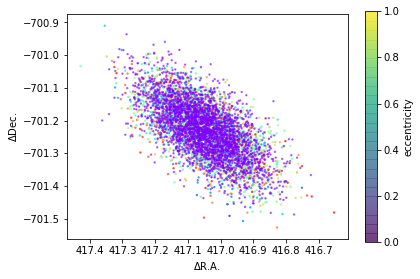

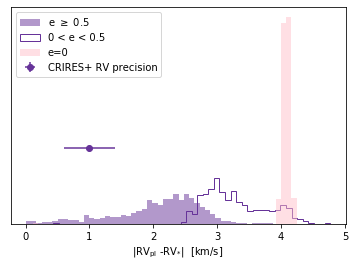

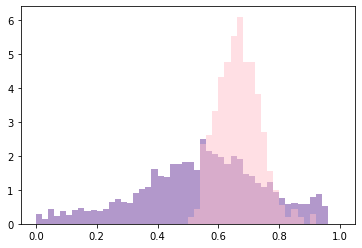

In [8]:
# run the accepted orbit fit posteriors forward in time; plot deltaRA & deltaDec by eccentricity
date = {"year": 2023, "month": 5, "day": 15}
epoch = Time(date, format="ymdhms")

n_to_plot = 3000
indx = np.random.choice(len(threegrav_results.post), size=n_to_plot)

raoff, deoff, rv = threegrav_results.system.compute_all_orbits(
    threegrav_results.post[indx, :].T, epochs=np.array([epoch.mjd])
)
raoff_pl = raoff[:, 1, :][0]
deoff_pl = deoff[:, 1, :][0]
rv_pl = rv[:, 1, :][0] - rv[:, 0, :][0]

fig, ax = plt.subplots()
eccentricities = threegrav_results.post[indx, :][:, 1]
plt.scatter(raoff_pl, deoff_pl, color=cm.rainbow(eccentricities), alpha=0.75, s=2)

indx = np.random.choice(len(fixed_ecc_results.post), size=n_to_plot)
raoff, deoff, rv = fixed_ecc_results.system.compute_all_orbits(
    fixed_ecc_results.post[indx, :].T, epochs=np.array([epoch.mjd])
)
raoff_pl = raoff[:, 1, :][0]
deoff_pl = deoff[:, 1, :][0]
rv_pl_e0 = rv[:, 1, :][0] - rv[:, 0, :][0]

plt.scatter(raoff_pl, deoff_pl, color=cm.rainbow(np.zeros(n_to_plot)), alpha=0.5, s=2)
plt.ylabel("$\Delta$Dec.")
plt.xlabel("$\Delta$R.A.")
ax.set_xlim((ax.get_xlim()[1], ax.get_xlim()[0]))
ax.set_aspect("equal")

ax_cbar = plt.colorbar()
ax_cbar.set_label("eccentricity")
plt.tight_layout()
plt.savefig(
    "results/plots/orbit_predict{}-{}.png".format(date["month"], date["year"]), dpi=250
)

plt.figure()
plt.hist(
    np.abs(rv_pl[eccentricities >= 0.5]),
    bins=50,
    color="rebeccapurple",
    alpha=0.5,
    label="e $\\geq$ 0.5",
    density=True,
)
plt.hist(
    np.abs(rv_pl[eccentricities < 0.5]),
    bins=50,
    color="rebeccapurple",
    label="0 < e < 0.5",
    density=True,
    histtype="step",
)

crires_rvprec = 0.4
plt.hist(
    np.abs(rv_pl_e0),
    bins=50,
    color="pink",
    alpha=0.5,
    label="e=0",
    density=True,
)
plt.xlabel("|RV$_{{\\mathrm{{pl}}}}$ -RV$_{{\\mathrm{{*}}}}$|  [km/s]")
plt.errorbar(
    [1],
    [2],
    [0],
    [crires_rvprec],
    fmt="o",
    color="rebeccapurple",
    label="CRIRES+ RV precision",
)
plt.yticks([])
plt.legend()
plt.savefig(
    "results/plots/rv_predict{}-{}.png".format(date["month"], date["year"]), dpi=250
)

# estimate posterior improvement given a crires+ measurement
updated_ecc = eccentricities[(rv_pl > 2 - crires_rvprec) & (rv_pl < 2 + crires_rvprec)]
plt.figure()
plt.hist(
    eccentricities,
    alpha=0.5,
    color="rebeccapurple",
    range=(0, 1),
    bins=50,
    density=True,
)
print(np.std(eccentricities))
print(np.std(updated_ecc))
plt.hist(updated_ecc, alpha=0.5, color="pink", range=(0, 1), bins=50, density=True)